## LIBS

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

## DATABASE

In [99]:
data = pd.read_csv('dados.csv', sep=';')
data

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


## Null Values

In [100]:
data.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

## Duplicated Instences

In [101]:
data[data.duplicated(['CODIGO'], keep=False)]


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [102]:
data.drop_duplicates(subset='CODIGO', keep='first', inplace=True)
data[data.duplicated(['CODIGO'], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


## PIBS

In [103]:
data['PIB'].describe()

count       172.000000
mean      19888.315407
std       17650.235267
min        8236.630000
25%       13595.255000
50%       16846.770000
75%       21334.432500
max      223848.220000
Name: PIB, dtype: float64

<Axes: ylabel='PIB'>

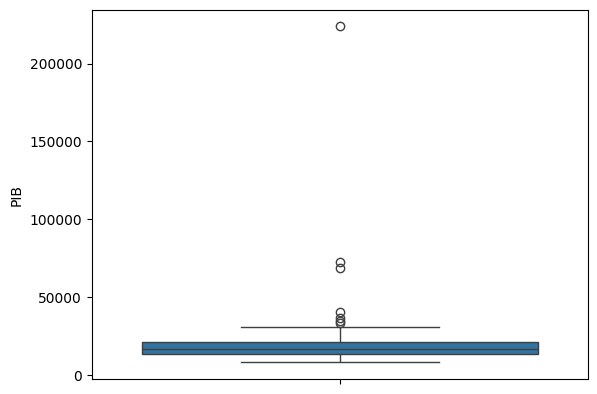

In [104]:
sns.boxplot(data['PIB'])

In [105]:
pib_desv = sts.stdev(data['PIB'])
pib_desv

17650.23526703751

{'whiskers': [<matplotlib.lines.Line2D at 0x18d3fada180>,
 'caps': [<matplotlib.lines.Line2D at 0x18d3fada750>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d3fad9f40>],
 'medians': [<matplotlib.lines.Line2D at 0x18d3fadad50>],
 'fliers': [],
 'means': []}

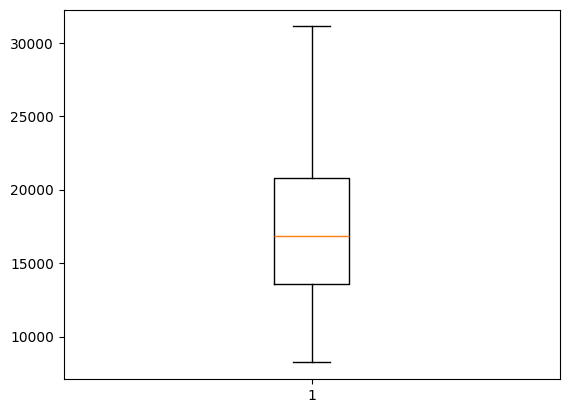

In [106]:
data.loc[data['PIB'] >= 2 * pib_desv, 'PIB'] = pib_desv
plt.boxplot(data['PIB'], showfliers=False)

<Axes: xlabel='PIB'>

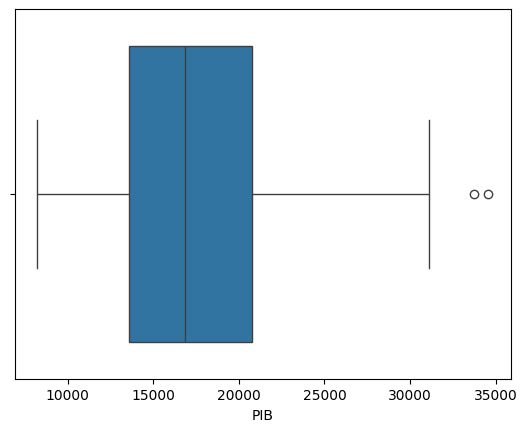

In [107]:
sns.boxplot(data['PIB'], orient='h')

## Valor Empenho

In [108]:
data['VALOREMPENHO'].describe()

count    1.720000e+02
mean     1.323686e+05
std      1.669390e+05
min      1.721300e+02
25%      5.242277e+04
50%      8.347715e+04
75%      1.566785e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

<Axes: ylabel='VALOREMPENHO'>

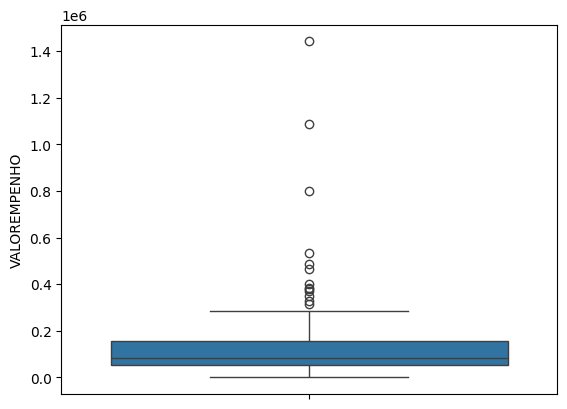

In [109]:
sns.boxplot(data['VALOREMPENHO'])

In [110]:
valor_desv = sts.stdev(data['VALOREMPENHO'])
valor_desv

166939.00802593995

{'whiskers': [<matplotlib.lines.Line2D at 0x18d40b88710>,
 'caps': [<matplotlib.lines.Line2D at 0x18d40b88d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d40b88470>],
 'medians': [<matplotlib.lines.Line2D at 0x18d40b892e0>],
 'fliers': [],
 'means': []}

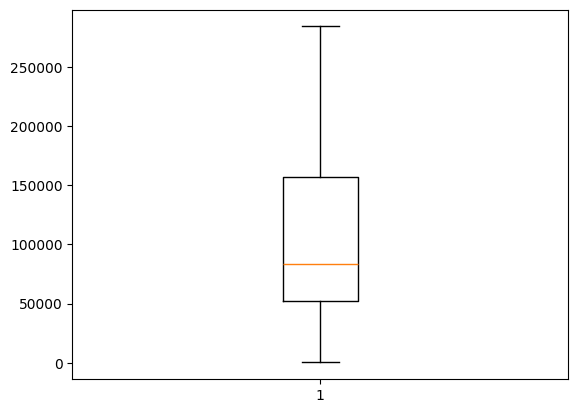

In [111]:
data.loc[data['VALOREMPENHO'] >= 2 * valor_desv, 'VALOREMPENHO'] = valor_desv
plt.boxplot(data['VALOREMPENHO'], showfliers=False)

<Axes: xlabel='VALOREMPENHO'>

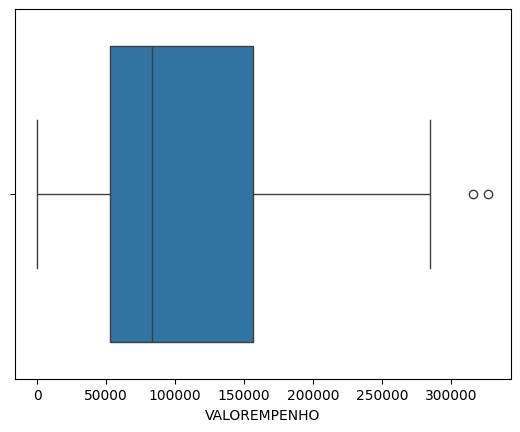

In [112]:
sns.boxplot(data['VALOREMPENHO'], orient='h')

## Dispersão

<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

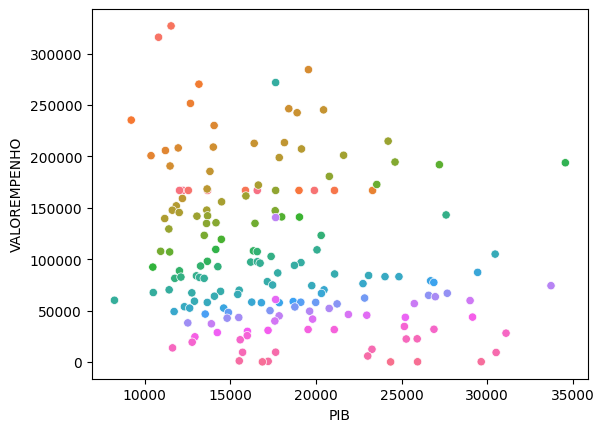

In [113]:
sns.scatterplot(x=data.PIB, y=data.VALOREMPENHO, hue=data.MUNICIPIO, legend=False)

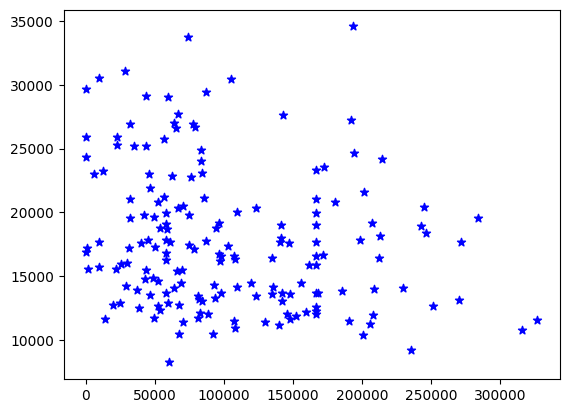

In [114]:
plt.scatter(data.VALOREMPENHO, data.PIB, marker='*', color='blue')

## Maiores PIBS

In [115]:
pibs_maiores = data.sort_values('PIB', ascending=False).head(6)
pibs_maiores

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
68,75,MARAU,34568.53,193840.83
145,276,GLORINHA,33730.13,74325.48
169,329,VILA MARIA,31104.22,28149.89
175,96,PORTO ALEGRE,30524.80,9358.33
106,273,EUGENIO DE CASTRO,30468.92,105023.36
183,107,SANTA BARBARA DO SUL,29654.02,365.00


<Axes: xlabel='PIB', ylabel='MUNICIPIO'>

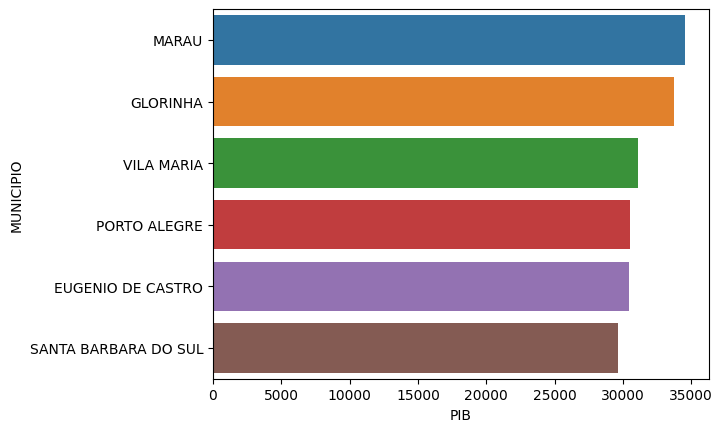

In [116]:
sns.barplot(x='PIB', y='MUNICIPIO', data=pibs_maiores, hue='MUNICIPIO')

## Maiores Valor Empenho

In [117]:
valor_maiores = data.sort_values('VALOREMPENHO', ascending=False).head(6)
valor_maiores

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
7,325,TUNAS,11543.020000,326884.60
6,95,PIRATINI,10811.670000,315884.50
20,79,MOSTARDAS,19565.250000,284378.16
91,356,GARRUCHOS,17650.235267,271841.26
12,297,PARAISO DO SUL,13170.250000,270262.04
13,125,SAO LOURENCO DO SUL,12674.700000,251561.35


<Axes: xlabel='VALOREMPENHO', ylabel='MUNICIPIO'>

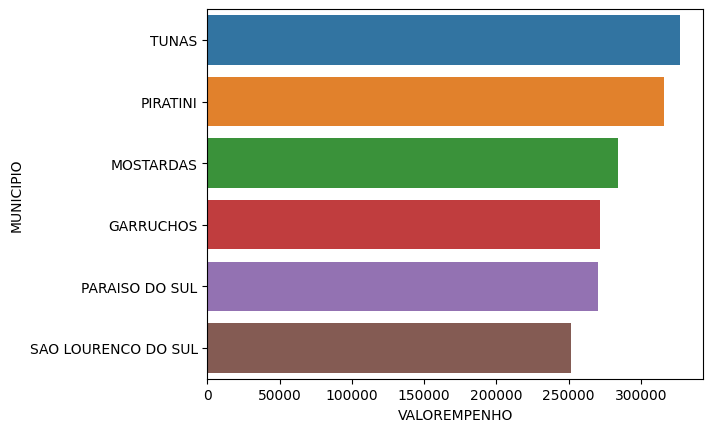

In [118]:
sns.barplot(x='VALOREMPENHO', y='MUNICIPIO', data=valor_maiores, hue='MUNICIPIO')

## Maiores VALOREMPENHO x PIB
- Porcentagem do PIB empenhado

In [119]:
data['PROPORCAO'] = data['VALOREMPENHO'] / data['PIB']
pib_valor_maiores = data.sort_values('PROPORCAO', ascending=False).head(6)
pib_valor_maiores

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PROPORCAO
6,95,PIRATINI,10811.67,315884.50,29.216994
7,325,TUNAS,11543.02,326884.60,28.318811
11,248,AMARAL FERRADOR,9216.87,235327.02,25.532206
12,297,PARAISO DO SUL,13170.25,270262.04,20.520646
13,125,SAO LOURENCO DO SUL,12674.70,251561.35,19.847519
15,38,ENCRUZILHADA DO SUL,10372.80,200738.61,19.352403


Text(0.5, 0, 'PIB Empenhado')

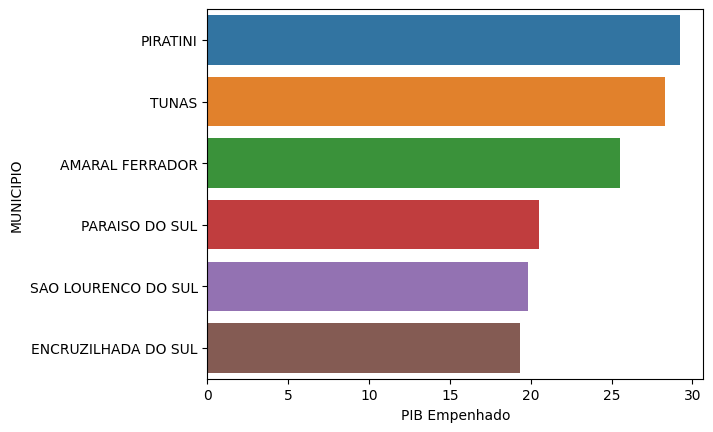

In [120]:
sns.barplot(x='PROPORCAO', y='MUNICIPIO', data=pib_valor_maiores, hue='MUNICIPIO').set_xlabel('PIB Empenhado')